In [1]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='UrbanSound8K/aud.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [2]:
print(librosa_audio_data)

[ 0.00330576  0.00468387  0.00360455 ... -0.0037562  -0.00348641
 -0.00356705]


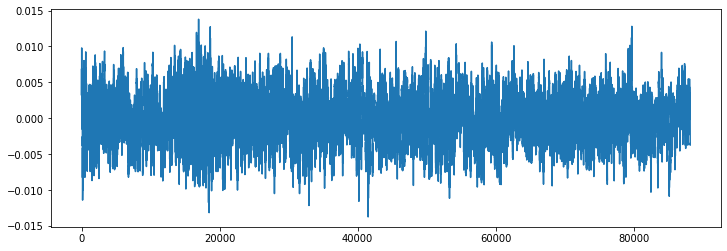

In [3]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
%matplotlib inline
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [4]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [5]:
wave_audio

array([[ 194,  100],
       [ 179,  113],
       [ 160,  124],
       ...,
       [-143,  -87],
       [-134,  -91],
       [-110,  -98]], dtype=int16)

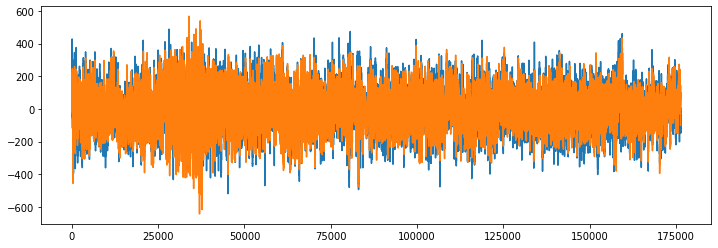

In [6]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

# Extract Features

Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.


In [7]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [8]:
mfccs

array([[-4.45197296e+02, -4.47219299e+02, -4.49755127e+02, ...,
        -4.77412781e+02, -4.74241730e+02, -4.82704987e+02],
       [ 1.12513962e+02,  1.11970383e+02,  1.12244164e+02, ...,
         1.12045395e+02,  1.12248581e+02,  1.05560913e+02],
       [-1.58260956e+01, -2.30021858e+01, -3.12500191e+01, ...,
        -9.15441895e+00, -1.03232269e+01, -7.39410782e+00],
       ...,
       [-7.82766438e+00, -5.03880453e+00, -4.48165321e+00, ...,
        -1.90692663e-01,  4.34143877e+00,  1.00339069e+01],
       [-1.91763425e+00, -8.02737474e-01, -1.20930445e+00, ...,
        -1.23640060e-01,  2.90507078e-02,  9.22017395e-01],
       [-3.88130128e-01,  3.09317529e-01,  6.72155476e+00, ...,
        -2.33736753e+00, -4.25180006e+00, -2.31323004e+00]], dtype=float32)

In [9]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [10]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [11]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3554it [04:35, 15.00it/s]c:\users\nvish\appdata\local\programs\python\python37\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
8326it [10:06, 19.39it/s]c:\users\nvish\appdata\local\programs\python\python37\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
c:\users\nvish\appdata\local\programs\python\python37\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
8732it [10:30, 13.84it/s]


In [12]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.793, 71.66612, -131.81377, -52.09133, -2...",dog_bark
1,"[-424.68686, 110.562294, -54.14824, 62.01074, ...",children_playing
2,"[-459.56473, 122.80033, -47.924713, 53.265697,...",children_playing
3,"[-414.55374, 102.89688, -36.66496, 54.180405, ...",children_playing
4,"[-447.39703, 115.0954, -53.809113, 61.608585, ...",children_playing


In [13]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [14]:
X.shape

(8732, 40)

In [15]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [16]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [17]:
y.shape

(8732, 10)

In [18]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
X_train

array([[-1.3183617e+02,  1.1397461e+02, -2.3956865e+01, ...,
         3.3314774e+00, -1.4786109e+00,  2.8736587e+00],
       [-1.4074219e+01,  9.1916931e+01, -8.6787205e+00, ...,
        -3.3844023e+00, -5.2119040e+00, -1.5936146e+00],
       [-4.9532028e+01,  1.5521851e-01, -2.0369112e+01, ...,
         2.0491765e+00, -8.0537474e-01,  2.7793031e+00],
       ...,
       [-4.2699329e+02,  9.2890671e+01,  3.0233381e+00, ...,
         8.6335939e-01,  6.4766794e-01,  7.8490311e-01],
       [-1.4607025e+02,  1.3709459e+02, -3.4298355e+01, ...,
         1.3777868e+00, -1.9530841e+00, -8.9652294e-01],
       [-4.2167459e+02,  2.1169028e+02,  2.6820295e+00, ...,
        -5.1484942e+00, -3.6400855e+00, -1.3321637e+00]], dtype=float32)

In [20]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
X_train.shape

(6985, 40)

In [22]:
X_test.shape

(1747, 40)

In [23]:
y_train.shape

(6985, 10)

In [24]:
y_test.shape

(1747, 10)

# Model Creation

In [25]:
import tensorflow as tf
print(tf.__version__)

1.15.4


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [27]:
### No of classes
num_labels=y.shape[1]

In [28]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

W0718 20:12:39.028267 18180 deprecation.py:506] From c:\users\nvish\appdata\local\programs\python\python37\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [30]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [31]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Train on 6985 samples, validate on 1747 samples
Epoch 1/100
6624/6985 [===========================>..] - ETA: 0s - loss: 10.6402 - acc: 0.1125
Epoch 00001: val_loss improved from inf to 2.28883, saving model to saved_models/audio_classification.hdf5
6985/6985 [==============================] - 1s 102us/sample - loss: 10.2448 - acc: 0.1127 - val_loss: 2.2888 - val_acc: 0.1162
Epoch 2/100
6976/6985 [============================>.] - ETA: 0s - loss: 2.5579 - acc: 0.1274
Epoch 00002: val_loss improved from 2.28883 to 2.28140, saving model to saved_models/audio_classification.hdf5
6985/6985 [==============================] - 1s 94us/sample - loss: 2.5575 - acc: 0.1276 - val_loss: 2.2814 - val_acc: 0.1145
Epoch 3/100
6720/6985 [===========================>..] - ETA: 0s - loss: 2.3387 - acc: 0.1310
Epoch 00003: val_loss improved from 2.28140 to 2.26670, saving model to saved_models/audio_classification.hdf5
6985/6985 [==============================] - 1s 92us/sample - loss: 2.3358 - acc: 0.13

Epoch 26/100
6784/6985 [============================>.] - ETA: 0s - loss: 1.4010 - acc: 0.5258
Epoch 00026: val_loss did not improve from 1.19926
6985/6985 [==============================] - 0s 68us/sample - loss: 1.4009 - acc: 0.5257 - val_loss: 1.2191 - val_acc: 0.5947
Epoch 27/100
6784/6985 [============================>.] - ETA: 0s - loss: 1.3782 - acc: 0.5262
Epoch 00027: val_loss did not improve from 1.19926
6985/6985 [==============================] - 0s 67us/sample - loss: 1.3801 - acc: 0.5261 - val_loss: 1.2069 - val_acc: 0.6119
Epoch 28/100
6912/6985 [============================>.] - ETA: 0s - loss: 1.3464 - acc: 0.5360
Epoch 00028: val_loss improved from 1.19926 to 1.18883, saving model to saved_models/audio_classification.hdf5
6985/6985 [==============================] - 1s 84us/sample - loss: 1.3486 - acc: 0.5350 - val_loss: 1.1888 - val_acc: 0.5982
Epoch 29/100
6976/6985 [============================>.] - ETA: 0s - loss: 1.3423 - acc: 0.5449
Epoch 00029: val_loss improve

Epoch 53/100
6912/6985 [============================>.] - ETA: 0s - loss: 1.1142 - acc: 0.6296
Epoch 00053: val_loss improved from 0.94839 to 0.93344, saving model to saved_models/audio_classification.hdf5
6985/6985 [==============================] - 1s 83us/sample - loss: 1.1136 - acc: 0.6296 - val_loss: 0.9334 - val_acc: 0.6943
Epoch 54/100
6208/6985 [=========================>....] - ETA: 0s - loss: 1.0977 - acc: 0.6253
Epoch 00054: val_loss improved from 0.93344 to 0.91508, saving model to saved_models/audio_classification.hdf5
6985/6985 [==============================] - 1s 98us/sample - loss: 1.0986 - acc: 0.6261 - val_loss: 0.9151 - val_acc: 0.7012
Epoch 55/100
6720/6985 [===========================>..] - ETA: 0s - loss: 1.1036 - acc: 0.6293
Epoch 00055: val_loss did not improve from 0.91508
6985/6985 [==============================] - 0s 67us/sample - loss: 1.1040 - acc: 0.6292 - val_loss: 0.9209 - val_acc: 0.6943
Epoch 56/100
6912/6985 [============================>.] - ETA: 0

6985/6985 [==============================] - 1s 88us/sample - loss: 1.0139 - acc: 0.6644 - val_loss: 0.8223 - val_acc: 0.7378
Epoch 81/100
6880/6985 [============================>.] - ETA: 0s - loss: 0.9991 - acc: 0.6632
Epoch 00081: val_loss improved from 0.82232 to 0.80616, saving model to saved_models/audio_classification.hdf5
6985/6985 [==============================] - 1s 86us/sample - loss: 0.9975 - acc: 0.6634 - val_loss: 0.8062 - val_acc: 0.7544
Epoch 82/100
6176/6985 [=========================>....] - ETA: 0s - loss: 1.0114 - acc: 0.6650
Epoch 00082: val_loss did not improve from 0.80616
6985/6985 [==============================] - 0s 65us/sample - loss: 1.0153 - acc: 0.6640 - val_loss: 0.8293 - val_acc: 0.7407
Epoch 83/100
6816/6985 [============================>.] - ETA: 0s - loss: 1.0199 - acc: 0.6639
Epoch 00083: val_loss did not improve from 0.80616
6985/6985 [==============================] - 0s 67us/sample - loss: 1.0147 - acc: 0.6650 - val_loss: 0.8075 - val_acc: 0.752

In [32]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.75844306


In [33]:
filename="UrbanSound8K/dog_bark.wav"
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
model.predict_classes(prediction_feature)

array([9], dtype=int64)

In [34]:
metadata['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [38]:
filename="UrbanSound8K/49312-2-0-10.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-2.1341058e+02  1.2267164e+02 -6.4622581e+01  2.3611301e+01
 -2.4450531e+01  2.2593090e+01 -2.6835791e+01 -1.4881384e-01
 -9.8573112e+00 -1.1127046e+00 -1.4054772e+01  8.4907923e+00
 -2.8172746e-01  1.6787030e+00 -6.7985854e+00  4.5146141e+00
 -9.1426477e+00  1.9578229e+00 -7.9780188e+00  3.0383403e+00
 -7.1154227e+00  2.6508683e-01 -4.6754465e+00  3.4898608e+00
 -2.4488137e+00 -3.1545484e+00 -4.9759936e+00 -4.5721126e+00
 -2.7716033e+00 -1.5121448e+00 -1.9013944e+00 -3.4303522e+00
 -3.6277282e+00 -3.0084082e-01 -7.4582779e-01 -1.6991037e-01
 -5.6919354e-01 -8.0121064e-01 -1.9375926e+00 -3.4180927e-01]
[[-2.1341058e+02  1.2267164e+02 -6.4622581e+01  2.3611301e+01
  -2.4450531e+01  2.2593090e+01 -2.6835791e+01 -1.4881384e-01
  -9.8573112e+00 -1.1127046e+00 -1.4054772e+01  8.4907923e+00
  -2.8172746e-01  1.6787030e+00 -6.7985854e+00  4.5146141e+00
  -9.1426477e+00  1.9578229e+00 -7.9780188e+00  3.0383403e+00
  -7.1154227e+00  2.6508683e-01 -4.6754465e+00  3.4898608e+00
  -2.4488137e+00 

array(['children_playing'], dtype='<U16')